<a href="https://colab.research.google.com/github/head1ton/kaggle_dev/blob/master/Guide_with_sklearn_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Importing Libraries and Packages
2.   Loading and Viewing Data Set
3.   Dealing with NaN Values (Imputation)
4.   Plotting and Visualizing Data
5.   Feature Engineering
6.   Feature Rescaling
7.   Modeling and Predicting with sklearn
8.   Evaluating Model Performances
9.   Submission



1. Importing Libraries and Packages

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("./"))

['.config', 'train.csv', 'test.csv', 'sample_data']


2. Loading and Viewing Data Set

In [0]:
training = pd.read_csv('./train.csv')
testing = pd.read_csv('./test.csv')

In [64]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [67]:
types_train = training.dtypes
types_train

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [68]:
num_values = types_train[(types_train == float)]
print("These are the numerical features: ")
print(num_values)

These are the numerical features: 
Age     float64
Fare    float64
dtype: object


In [69]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


3. Dealing with NaN Values (Imputation)

In [70]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum())
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [71]:
training.drop(labels=['Cabin', 'Ticket'], axis=1, inplace=True)
testing.drop(labels=['Cabin', 'Ticket'], axis=1, inplace=True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


연령 열의 분포를 확인해보고 비뚤어지거나 대칭인지를 확인한다. NaN값을 대체 할 값을 결정하는데 도움이 된다.

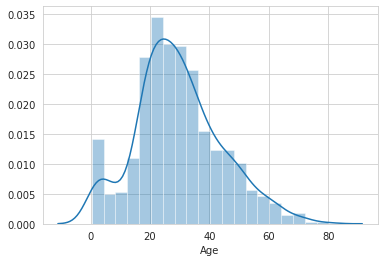

In [72]:
copy = training.copy()
copy.dropna(inplace=True)
sns.distplot(copy["Age"])

In [73]:
training["Age"].fillna(training["Age"].median(), inplace=True)
testing["Age"].fillna(testing["Age"].median(), inplace=True)
training["Embarked"].fillna("S", inplace=True)
testing["Fare"].fillna(testing["Fare"].median(), inplace=True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [74]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [75]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


4. Plotting and Visualizing Data

Gender

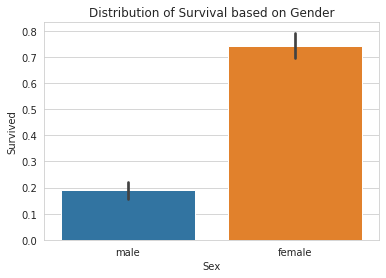

Total people survived is : 342
Proportion of Females who survived: 
0.6812865497076024
Proportion of Males who survived: 
0.31871345029239767


In [76]:
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is : " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived: ")
print(total_survived_females / (total_survived_females + total_survived_males))
print("Proportion of Males who survived: ")
print(total_survived_males / (total_survived_males + total_survived_females))

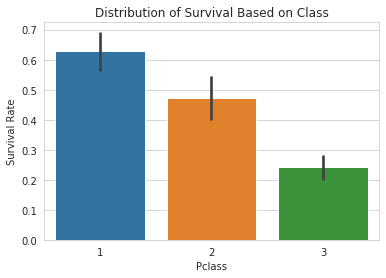

Total people survived is : 342
Proportion of Class 1 Passengers who survived: 
0.39766081871345027
Proportion of Class 2 Passengers who survived: 
0.2543859649122807
Proportion of Class 3 Passengers who survived: 
0.347953216374269


In [77]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is : " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived: ")
print(total_survived_one / total_survived_class)
print("Proportion of Class 2 Passengers who survived: ")
print(total_survived_two / total_survived_class)
print("Proportion of Class 3 Passengers who survived: ")
print(total_survived_three / total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

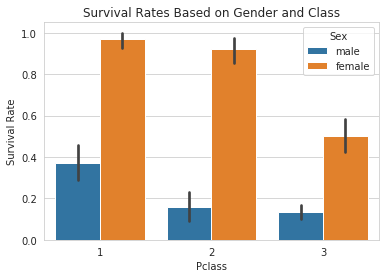

In [78]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

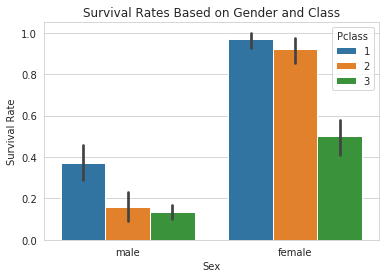

In [79]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Age

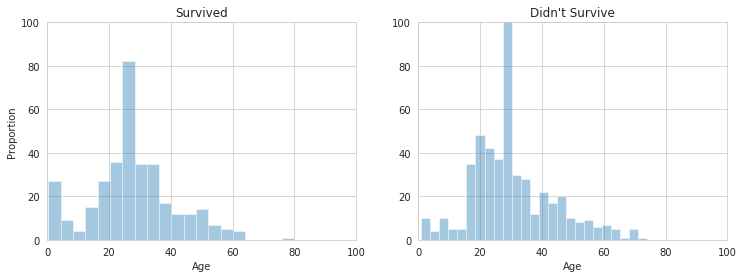

In [80]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

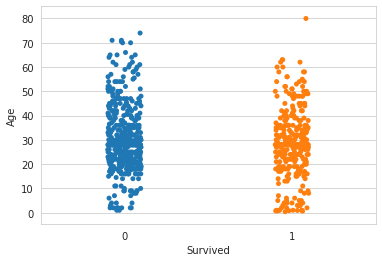

In [81]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

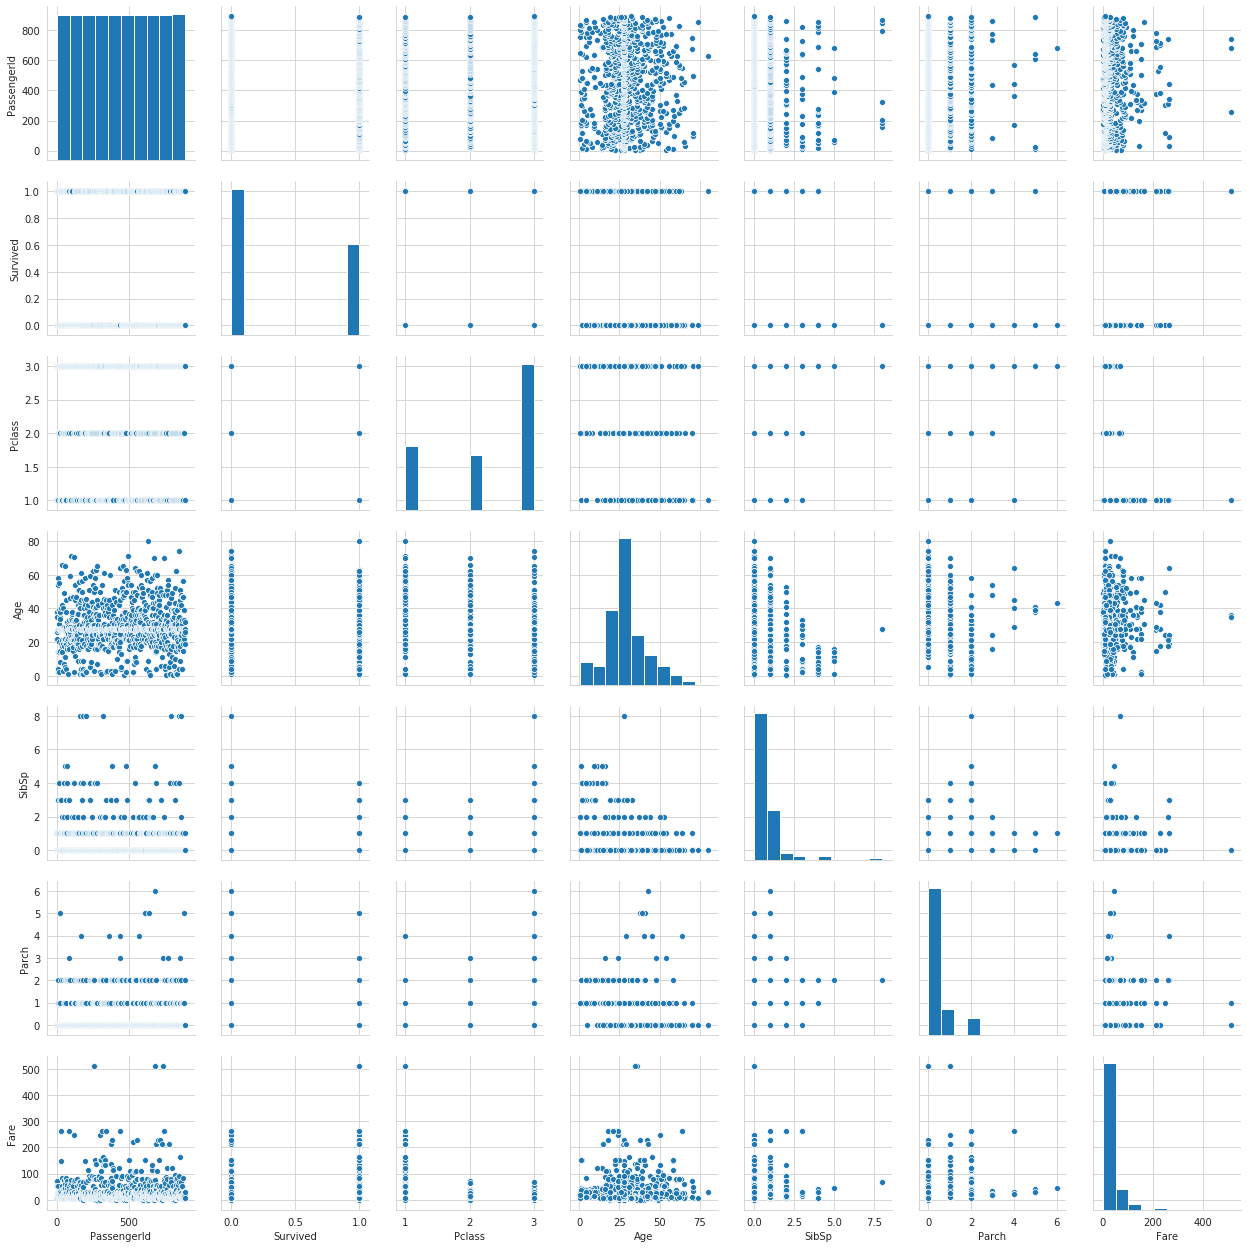

In [82]:
sns.pairplot(training)

5. Feature Engineering

Sex 및 Embarked 열의 값은 범주형 값이므로 모델에서 분류를 수행하려면 이러한 문자열을 숫자 값으로 나타내야 함. One-Hot-Encoding을 통해 수행 할 수도 있음.

In [83]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,15.0000,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,7.8542,S
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,15.9000,S
201,202,0,3,"Sage, Mr. Frederick",male,28.0,8,2,69.5500,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,13.0000,S


In [84]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
284,1176,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,20.2125,S
47,939,3,"Shaughnessy, Mr. Patrick",male,27.0,0,0,7.7500,Q
272,1164,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,1,0,136.7792,C
129,1021,3,"Petersen, Mr. Marius",male,24.0,0,0,8.0500,S
383,1275,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,16.1000,S


In [85]:
set(training["Embarked"])

{'C', 'Q', 'S'}

In [0]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training["Sex"])

encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

In [87]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


In [0]:
le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])

encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

In [89]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",0,22.0,1,0,66.6000,2
716,717,1,1,"Endres, Miss. Caroline Louise",0,38.0,0,0,227.5250,0
602,603,0,1,"Harrington, Mr. Charles H",1,28.0,0,0,42.4000,2
294,295,0,3,"Mineff, Mr. Ivan",1,24.0,0,0,7.8958,2
847,848,0,3,"Markoff, Mr. Marin",1,35.0,0,0,7.8958,0


In [90]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
108,1000,3,"Willer, Mr. Aaron (Abi Weller"")""",1,27.0,0,0,8.7125,2
325,1217,3,"Assam, Mr. Ali",1,23.0,0,0,7.0500,2
127,1019,3,"McCoy, Miss. Alicia",0,27.0,2,0,23.2500,1
365,1257,3,"Sage, Mrs. John (Annie Bullen)",0,27.0,1,9,69.5500,2
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",0,64.0,1,1,26.5500,2


Creating Synthetic Features

In [0]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["SibSp"] + 1

In [0]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [0]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.", expand=True)

for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.", expand=True)

In [94]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
696,697,0,3,"Kelly, Mr. James",1,44.0,0,0,8.0500,2,1,1,Mr
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,512.3292,0,2,0,Mr
580,581,1,2,"Christy, Miss. Julie Rachel",0,25.0,1,1,30.0000,2,3,0,Miss
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",1,28.0,0,0,8.1125,2,1,1,Mr
475,476,0,1,"Clifford, Mr. George Quincy",1,28.0,0,0,52.0000,2,1,1,Mr


In [95]:
titles = set(training["Title"])
print(titles)

{'Rev', 'Major', 'Col', 'Capt', 'Countess', 'Dr', 'Don', 'Mme', 'Ms', 'Mrs', 'Mlle', 'Sir', 'Mr', 'Lady', 'Jonkheer', 'Master', 'Miss'}


In [99]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    # print(frequency_titles)

print(frequency_titles)

[6, 2, 2, 1, 1, 7, 1, 1, 1, 125, 2, 1, 517, 1, 1, 40, 182]


In [97]:
title_list.count("Mrs")

125

In [100]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles": titles,
    "Frequency": frequency_titles
})
print(title_dataframe)

      Titles  Frequency
0        Rev          6
1      Major          2
2        Col          2
3       Capt          1
4   Countess          1
5         Dr          7
6        Don          1
7        Mme          1
8         Ms          1
9        Mrs        125
10      Mlle          2
11       Sir          1
12        Mr        517
13      Lady          1
14  Jonkheer          1
15    Master         40
16      Miss        182


In [0]:
title_replacements = {"Mlle": "Other",
                      "Major": "Other",
                      "Col": "Other",
                      "Sir": "Other",
                      "Don": "Other",
                      "Mme": "Other",
                      "Jonkheer": "Other",
                      "Lady": "Other",
                      "Capt": "Other",
                      "Countess": "Other",
                      "Ms": "Other",
                      "Dona": "Other"}
training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder()
le_title.fit(training["Title"])

encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

In [102]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",1,31.0,0,0,10.500,2,1,1,3
344,345,0,2,"Fox, Mr. Stanley Hubert",1,36.0,0,0,13.000,2,1,1,3
767,768,0,3,"Mangan, Miss. Mary",0,30.5,0,0,7.750,1,1,1,2
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",0,25.0,1,0,7.925,2,2,0,2
636,637,0,3,"Leinonen, Mr. Antti Gustaf",1,32.0,0,0,7.925,2,1,1,3


In [0]:
training.drop("Name", axis=1, inplace=True)
testing.drop("Name", axis=1, inplace=True)

In [104]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
87,88,0,3,1,28.0,0,0,8.0500,2,1,1,3
839,840,1,1,1,28.0,0,0,29.7000,0,1,1,3
335,336,0,3,1,28.0,0,0,7.8958,2,1,1,3
74,75,1,3,1,32.0,0,0,56.4958,2,1,1,3
533,534,1,3,0,28.0,0,2,22.3583,0,3,0,4


6. Feature Rescaling

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

In [0]:
training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

In [109]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
67,68,0,3,1,-0.796286,0,0,-0.484157,2,1,1,3
171,172,0,3,1,-1.949034,4,1,-0.061999,1,6,0,1
396,397,0,3,0,0.125912,0,0,-0.490280,2,1,1,2
259,260,1,2,0,1.586059,0,1,-0.124920,2,2,0,4
501,502,0,3,0,-0.642586,0,0,-0.492378,1,1,1,2


In [110]:
testing.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
207,1099,2,1,-0.441286,0,0,-0.449535,2,1,1,3
232,1124,3,1,-0.677719,1,0,-0.521317,2,3,0,3
330,1222,2,0,1.450181,0,2,0.021036,2,1,1,4
335,1227,1,1,0.031581,0,0,-0.171674,2,1,1,3
135,1027,3,1,-0.441286,0,0,-0.496965,2,1,1,3


7. Model Fitting, Optimizing, and Predicting

sklearn Models to Test

In [0]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [0]:
from sklearn.metrics import make_scorer, accuracy_score

GridSearchCV 를 사용하여 선택한 모델에 대한 최적의 매개 변수를 찾고 테스트 세트를 예측할 수 있다.

In [0]:
from sklearn.model_selection import GridSearchCV

Defining Features in Training/Test Set

In [0]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1)
y_train = training["Survived"]
X_test = testing.drop("PassengerId", axis=1)

In [116]:
X_train.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
688,3,1,-0.873136,0,0,-0.491456,2,1,1,3
648,3,1,-0.104637,0,0,-0.496405,2,1,1,3
476,2,1,0.356462,1,0,-0.225593,2,2,0,3
414,3,1,1.124960,0,0,-0.488854,2,1,1,3
59,3,1,-1.411085,5,2,0.295895,2,8,0,1


Validation Data Set

In [0]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

SVC Model

In [118]:
svc_clf = SVC()

parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_
svc_clf.fit(X_training, y_training)

pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [119]:
print("The Score for SVC is: " + str(acc_svc))

The Score for SVC is: 0.8212290502793296


LinearSVC Model

In [120]:
linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [100, 500, 1000, 1500]}

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is: " + str(acc_linsvc))

The Score for LinearSVC is: 0.7932960893854749


RandomForest Model

In [121]:
rf_clf = RandomForestClassifier()

parameters_rf = {
    "n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
    "criterion": ['gini', 'entropy'], 
    "max_features": ["auto", "sqrt", "log2"], 
    "max_depth": [2, 3, 5, 10], 
    "min_samples_split": [2, 3, 5, 10]
}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))

The Score for Random Forest is: 0.8268156424581006


In [122]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.837092484979809
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}


LogisticRegression Model

In [123]:
logreg_clf = LogisticRegression()

parameters_logreg = {
    "penalty": ["l2"], 
    "fit_intercept": [True, False], 
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], 
    "max_iter": [50, 100, 200], 
    "warm_start": [True, False]
}
grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

The Score for Logistic Regression is: 0.7988826815642458


In [124]:
print(grid_logreg.best_estimator_)
print(grid_logreg.best_params_)
print(grid_logreg.best_score_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
{'fit_intercept': True, 'max_iter': 50, 'penalty': 'l2', 'solver': 'sag', 'warm_start': False}
0.8047769132276175


KNeighbors Model

In [125]:
knn_clf = KNeighborsClassifier()

parameters_knn = {
    "n_neighbors": [3, 5, 10, 15],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": [20, 30, 50]
}
grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)
print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.7653631284916201


In [126]:
print(grid_knn.best_estimator_)
print(grid_knn.best_params_)
print(grid_knn.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')
{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 15, 'weights': 'uniform'}
0.7879050526937851


GaussianNB Model

In [127]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.776536312849162


In [128]:
print(grid_gnb.best_estimator_)
print(grid_gnb.best_params_)
print(grid_gnb.best_score_)

GaussianNB(priors=None, var_smoothing=1e-09)
{}
0.8104107160445189


DecisionTree Model

In [129]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_features": ["auto", "sqrt", "log2"]
}
grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.7821229050279329


XGBoostModel

In [132]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier()

parameters_xg = {
    # "objective": ["reg:linear"],
    "n_estimators": [5, 10, 15, 20]
}

grid_xg = GridSearchCV(xg_clf, parameters_xg, scoring=make_scorer(accuracy_score))
grid_xg.fit(X_training, y_training)

xg_clf = grid_xg.best_estimator_

xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print("The Score for XGBoost is: " + str(acc_xg))

The Score for XGBoost is: 0.8100558659217877


In [133]:
print(grid_xg.best_estimator_)
print(grid_xg.best_params_)
print(grid_xg.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
{'n_estimators': 20}
0.8244262779474048


8. Evaluating Model Performances

In [134]:
model_performance = pd.DataFrame({
    "Model": [
              "SVC",
              "Linear SVC",
              "Random Forest",
              "Logistic Regression",
              "K Nearest Neighbors",
              "Gaussian Naive Bayes",
              "Decision Tree",
              "XGBClassifier"
    ],
    "Accuracy": [
                 acc_svc,
                 acc_linsvc,
                 acc_rf,
                 acc_logreg,
                 acc_knn,
                 acc_gnb,
                 acc_dt,
                 acc_xg
    ]
})

model_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,0.826816
0,SVC,0.821229
7,XGBClassifier,0.810056
3,Logistic Regression,0.798883
1,Linear SVC,0.793296
6,Decision Tree,0.782123
5,Gaussian Naive Bayes,0.776536
4,K Nearest Neighbors,0.765363


9. Submission

In [135]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,1,0,0.433312,1,0,0.420730,2,2,0,4
4,3,1,0.433312,0,0,-0.486337,2,1,1,3


In [136]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [137]:
type(y_train)

pandas.core.series.Series

In [138]:
svc_clf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)

In [0]:
submission_predictions = svc_clf.predict(X_test)

In [140]:
submission = pd.DataFrame({
    "PassengerId": testing["PassengerId"],
    "Survived": submission_predictions
})

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)
